In [7]:
from MieSppForce import  green_func, frenel, dipoles, force
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad

In [3]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [17]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 110
dist = 2
a_angle = np.pi/4
angle = 25*np.pi/180
STOP = 45
point = [0,0,dist+R]
z0 = point[2]
wls=np.linspace(400,1100,100)
phase = 0


F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)


for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

 21%|██        | 21/100 [00:15<00:59,  1.33it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 39%|███▉      | 39/100 [00:30<00:55,  1.11it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


In [ ]:
def get_directivity(wl, P,M, eps_Au):
    px,py,pz = P
    mx, my,mz = M
    ka = -1j*np.sqrt(1/(eps_Au(wl)+1))
    kspp = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))
    I = lambda phi:  np.abs((mx/c_const+1j*ka*py)*np.sin(phi) + (my/c_const - 1j*ka*px)*np.cos(phi) - kspp*pz)**2
    Imax = quad(I, 0, 2 * np.pi)[0]
    return  2 * np.pi * I / Imax
    


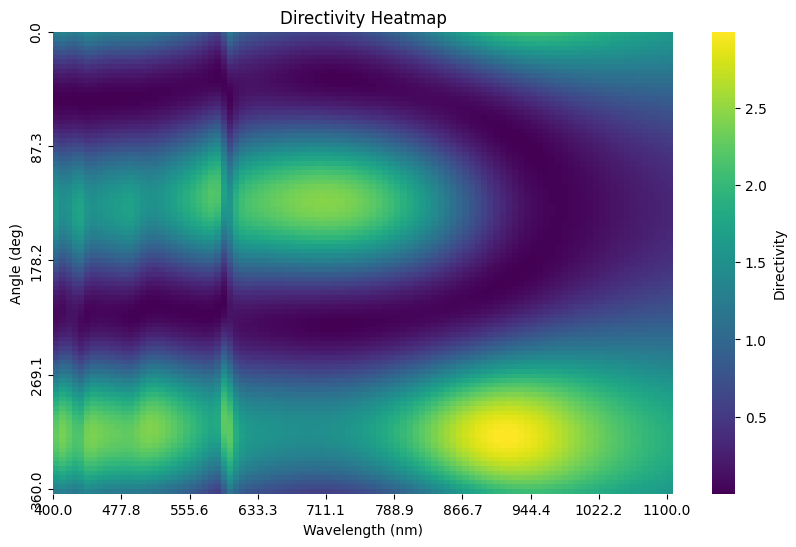

In [47]:
import seaborn as sns

PHI = np.linspace(0, 2*np.pi, 100)

directivity = np.empty((len(PHI), len(wls)))
for wl_idx, wl in enumerate(wls):
    for angle_idx in range(len(PHI)):
        D = get_directivity(wl, P[wl_idx,:], M[wl_idx,:], eps_Au)
        directivity[angle_idx, wl_idx] = D(PHI[angle_idx])

num_ticks=10
num_ticksy =5
plt.figure(figsize=(10, 6))
sns.heatmap(directivity, cmap='viridis', cbar_kws={'label': 'Directivity'})
plt.xlabel('Wavelength (nm)')
plt.ylabel('Angle (deg)')
plt.xticks(ticks=np.linspace(0, len(wls)-1, num_ticks), labels=np.round( wls[np.linspace(0, len(wls)-1, num_ticks).astype(int)], 1) )
plt.yticks(ticks=np.linspace(0, len(PHI)-1, num_ticksy), labels=np.round(PHI[np.linspace(0, len(PHI)-1, num_ticksy).astype(int)]/np.pi*180, 1))
plt.title('Directivity Heatmap')
plt.show()

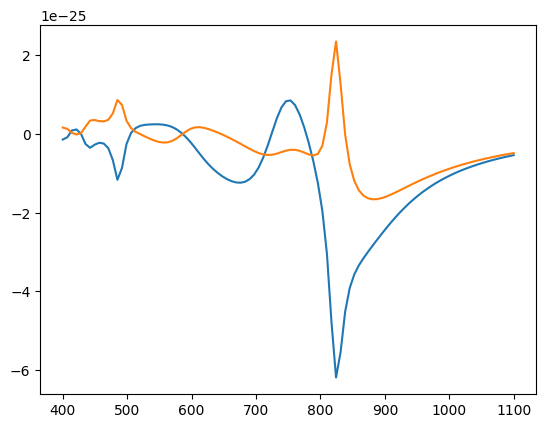

In [52]:
plt.plot(wls, F_x[:,0]-F_x[:,1]-F_x[:,4])
plt.plot(wls, F_y[:,0])

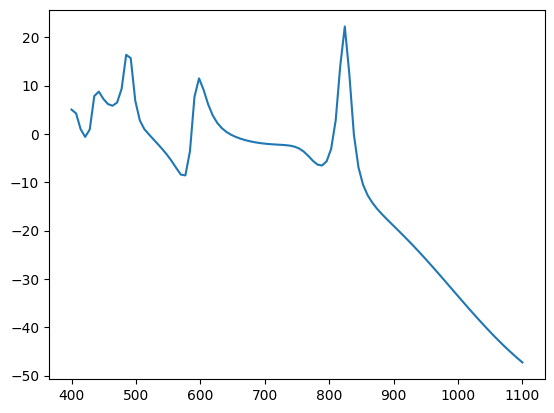

In [58]:
angles = np.arctan2(F_y[:,0], F_x[:,0])

plt.plot(wls, angles/np.pi*180)